In [64]:
# Assignment-based Subjective Questions
# 1. From your analysis of the categorical variables from the dataset, what could you infer about
# their effect on the dependent variable? (3 marks)
# changes

# 2. Why is it important to use drop_first=True during dummy variable creation? (2 mark)

# 3. Looking at the pair-plot among the numerical variables, which one has the highest correlation
# with the target variable? (1 mark)
# temperature

# 4. How did you validate the assumptions of Linear Regression after building the model on the
# training set? (3 marks)
# check vif & check if distribution is correct

# 5. Based on the final model, which are the top 3 features contributing significantly towards
# explaining the demand of the shared bikes? (2 marks)


# General Subjective Questions
# 1. Explain the linear regression algorithm in detail. (4 marks)
# 2. Explain the Anscombe’s quartet in detail. (3 marks)
# 3. What is Pearson’s R? (3 marks)
# 4. What is scaling? Why is scaling performed? What is the difference between normalized scaling
# and standardized scaling? (3 marks)
# 5. You might have observed that sometimes the value of VIF is infinite. Why does this happen?
# (3 marks)
# 6. What is a Q-Q plot? Explain the use and importance of a Q-Q plot in linear regression.
# (3 marks)


In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
from warnings import filterwarnings
filterwarnings('ignore')
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
day_df = pd.read_csv("day.csv", low_memory=False)
day_df.head(3)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   

    cnt  
0   985  
1   801  
2  1349

In [104]:
day_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
  - cnt: count of total rental bikes including both casual and registered

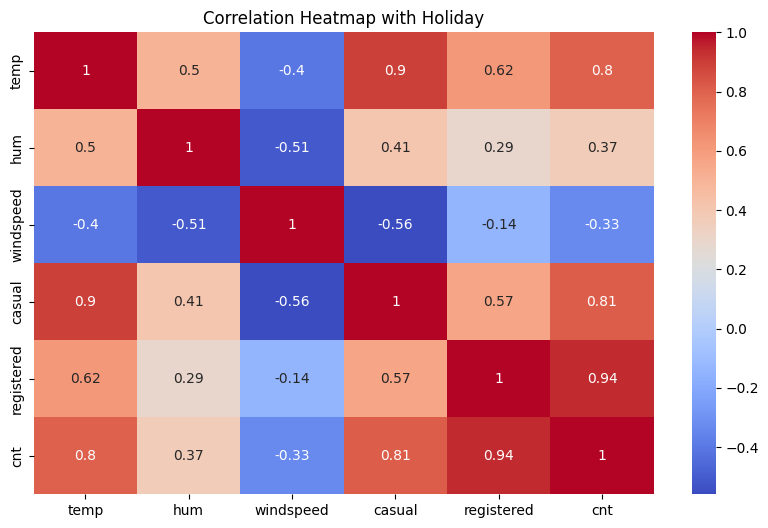

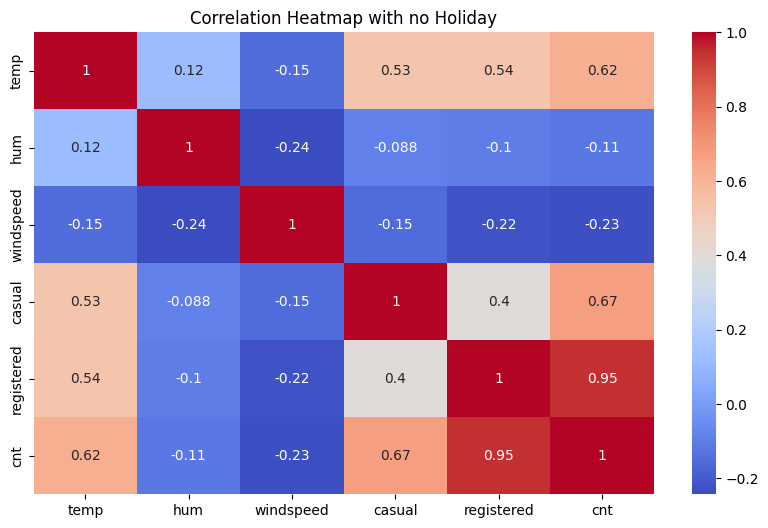

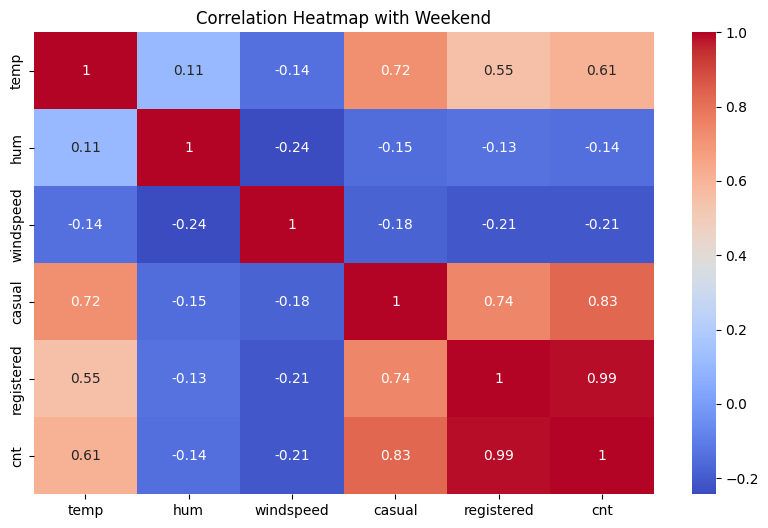

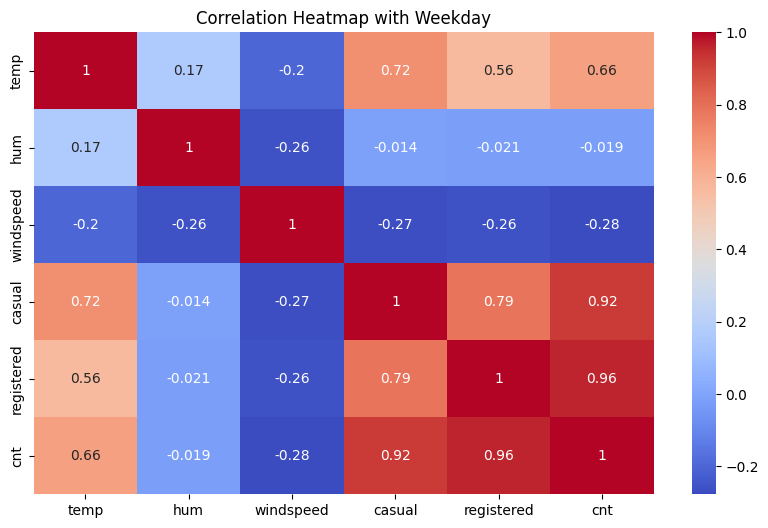

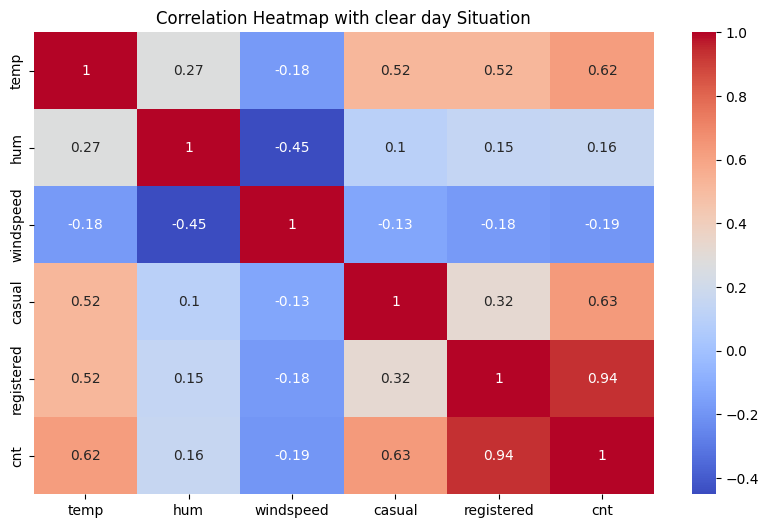

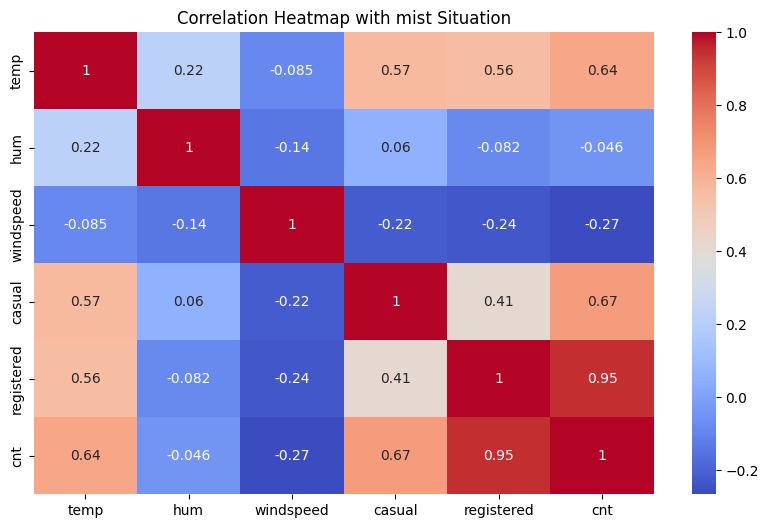

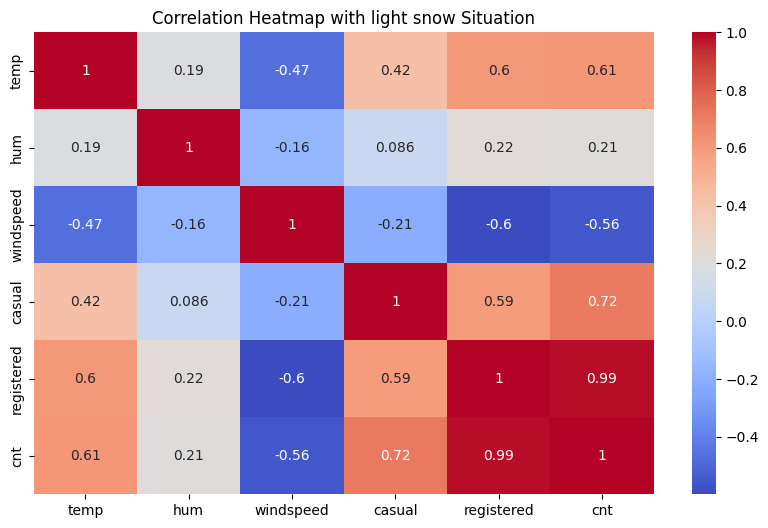

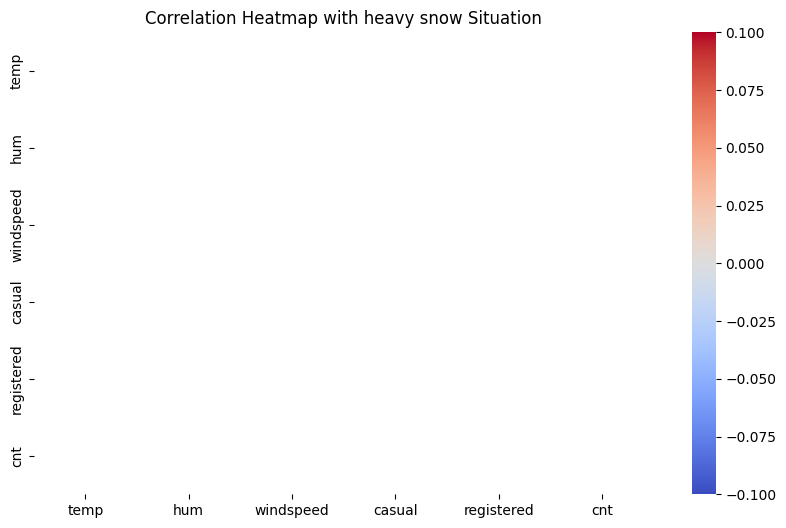

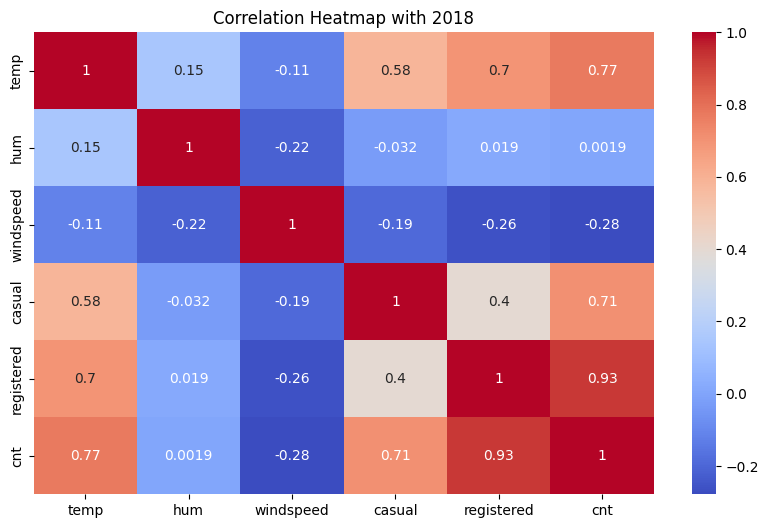

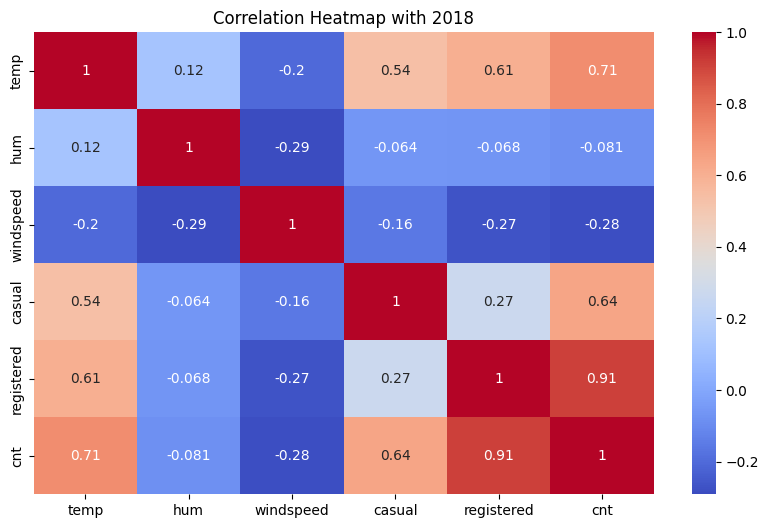

In [103]:
# Heatmap correlation for temp, hum, and windspeed with cnt, hue on holiday
plt.figure(figsize=(10, 6))
holiday_df = day_df[day_df['holiday'] == 1]
sns.heatmap(holiday_df[['temp', 'hum', 'windspeed','casual','registered', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Holiday')
plt.show()

plt.figure(figsize=(10, 6))
noholiday_df = day_df[day_df['holiday'] == 0]
sns.heatmap(noholiday_df[['temp', 'hum', 'windspeed','casual','registered', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with no Holiday')
plt.show()

# Heatmap correlation for temp, hum, and windspeed with cnt, hue on weekday
plt.figure(figsize=(10, 6))
working_day_df = day_df[(day_df['workingday'] == 1)]
sns.heatmap(working_day_df[['temp', 'hum', 'windspeed','casual','registered', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Weekend')
plt.show()

plt.figure(figsize=(10, 6))
nonworking_day_df = day_df[(day_df['workingday'] == 0) ]
sns.heatmap(nonworking_day_df[['temp', 'hum', 'windspeed', 'casual','registered','cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Weekday')
plt.show()


# Heatmap correlation for temp, hum, and windspeed with cnt, hue on weathersit
plt.figure(figsize=(10, 6))
clear_day_df = day_df[day_df['weathersit'] == 1]
sns.heatmap(clear_day_df[['temp', 'hum', 'windspeed','casual','registered', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with clear day Situation')
plt.show()

plt.figure(figsize=(10, 6))
mist_day_df = day_df[day_df['weathersit'] == 2]
sns.heatmap(mist_day_df[['temp', 'hum', 'windspeed', 'casual','registered','cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with mist Situation')
plt.show()

plt.figure(figsize=(10, 6))
lsnow_day_df = day_df[day_df['weathersit'] == 3]
sns.heatmap(lsnow_day_df[['temp', 'hum', 'windspeed','casual','registered', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with light snow Situation')
plt.show()

plt.figure(figsize=(10, 6))
hsnow_day_df = day_df[day_df['weathersit'] == 4]
sns.heatmap(hsnow_day_df[['temp', 'hum', 'windspeed','casual','registered', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with heavy snow Situation')
plt.show()

# Heatmap correlation for temp, hum, and windspeed with cnt, hue on year
plt.figure(figsize=(10, 6))
year0_day_df = day_df[day_df['yr'] == 0]
sns.heatmap(year0_day_df[['temp', 'hum', 'windspeed','casual','registered', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with 2018')
plt.show()

plt.figure(figsize=(10, 6))
year1_day_df = day_df[day_df['yr'] == 1]
sns.heatmap(year1_day_df[['temp', 'hum', 'windspeed','casual','registered', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with 2018')
plt.show()

# New Section

In [69]:
# print(day_df.shape) # (39717, 111)
# print(day_df.info(verbose = True))

In [70]:
# # function to find the null columns having a threshold.
# def findNonNullColumns(day_df, fraction):
#     return day_df[day_df.columns[day_df.isnull().sum() < fraction * len(day_df)]].columns

In [ ]:
# Convert 'dteday' column to datetime objects
day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='%d-%m-%Y') # Added the correct format string to the function call

# Extract numerical features for correlation analysis
numerical_features = day_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

print(correlation_matrix)

             instant        season            yr          mnth   holiday  \
instant     1.000000  4.135867e-01  8.660262e-01  4.982507e-01  0.016275   
season      0.413587  1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868   
yr          0.866026 -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195   
mnth        0.498251  8.310321e-01 -5.162656e-16  1.000000e+00  0.018905   
holiday     0.016275 -1.086804e-02  8.195345e-03  1.890483e-02  1.000000   
weekday    -0.000023 -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962   
workingday -0.004619  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948   
weathersit -0.021862  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395   
temp        0.150738  3.333607e-01  4.878919e-02  2.190833e-01 -0.028764   
atemp       0.152773  3.420139e-01  4.721519e-02  2.264302e-01 -0.032703   
hum         0.016080  2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662   
windspeed  -0.112667 -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257   
casual      

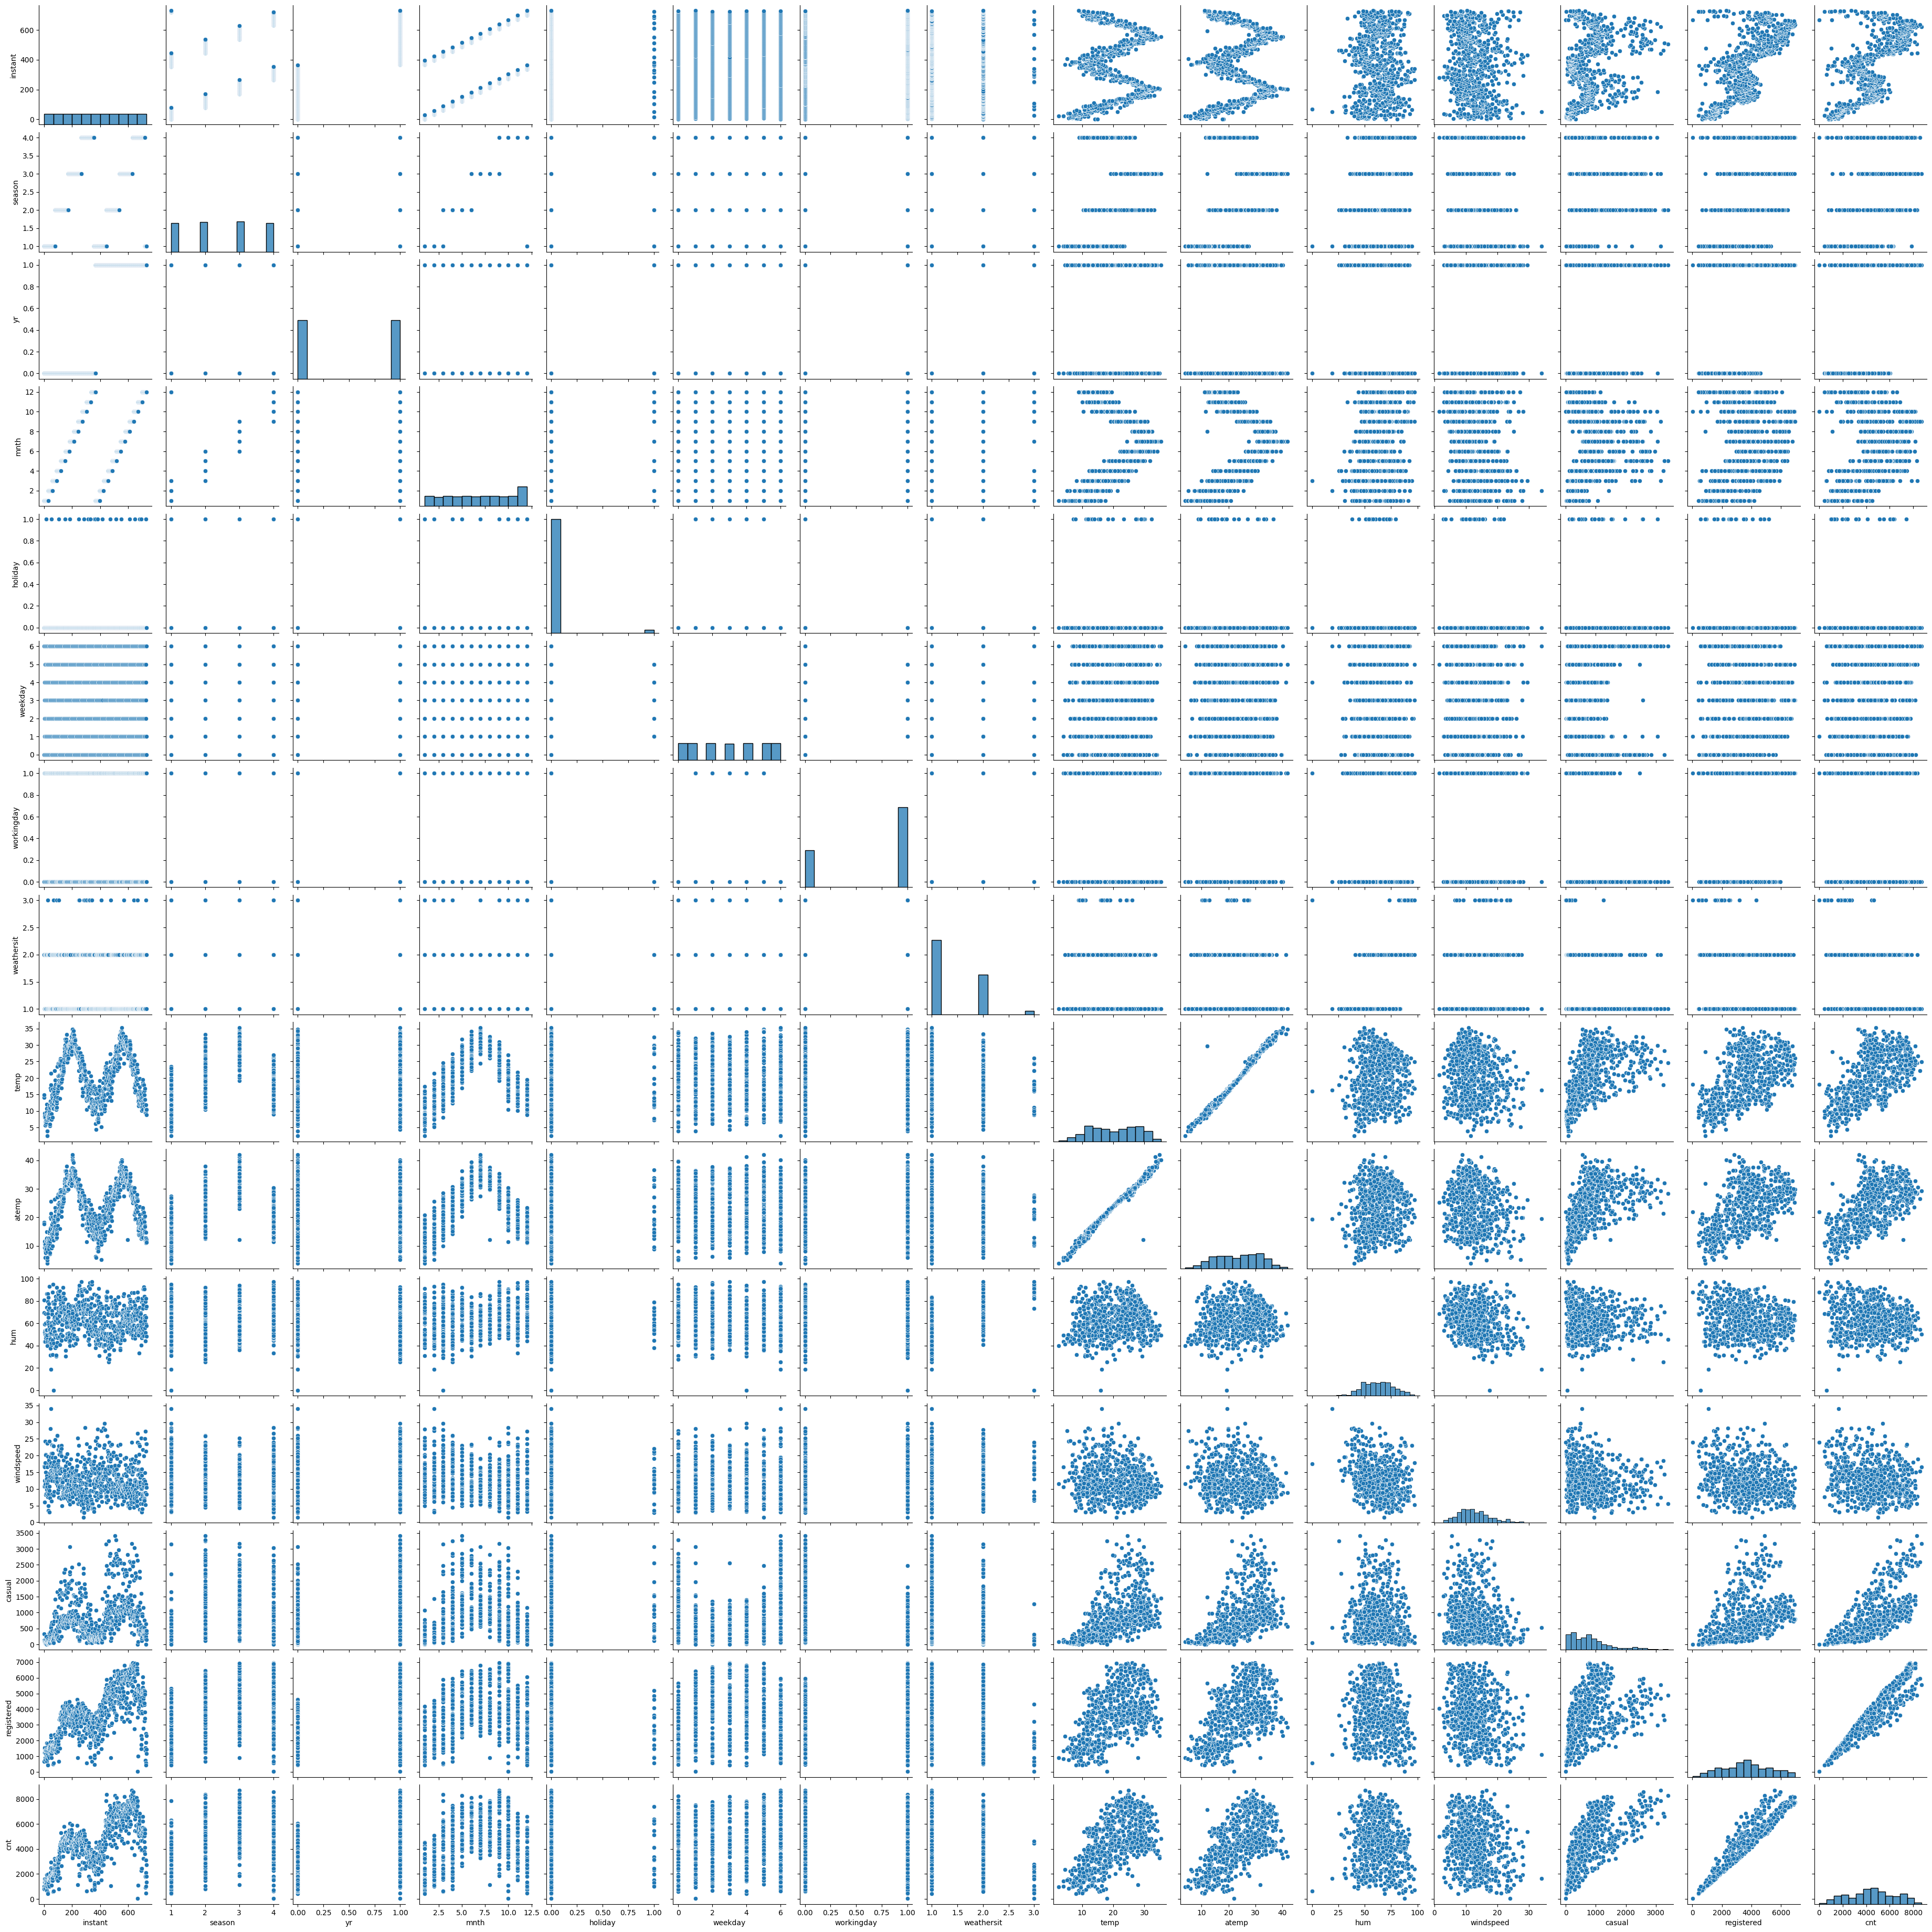

In [ ]:
# prompt: create pair plot for numerical_features


sns.pairplot(numerical_features)
plt.show()


Frame: Correlation with temperature continuous variable breakdown on working day/yr/season/holiday
create pair plot with temp and cnt

we can filter out high correl with temp

approach 2:
create two linear regression model one to predict casual and reg and then club them

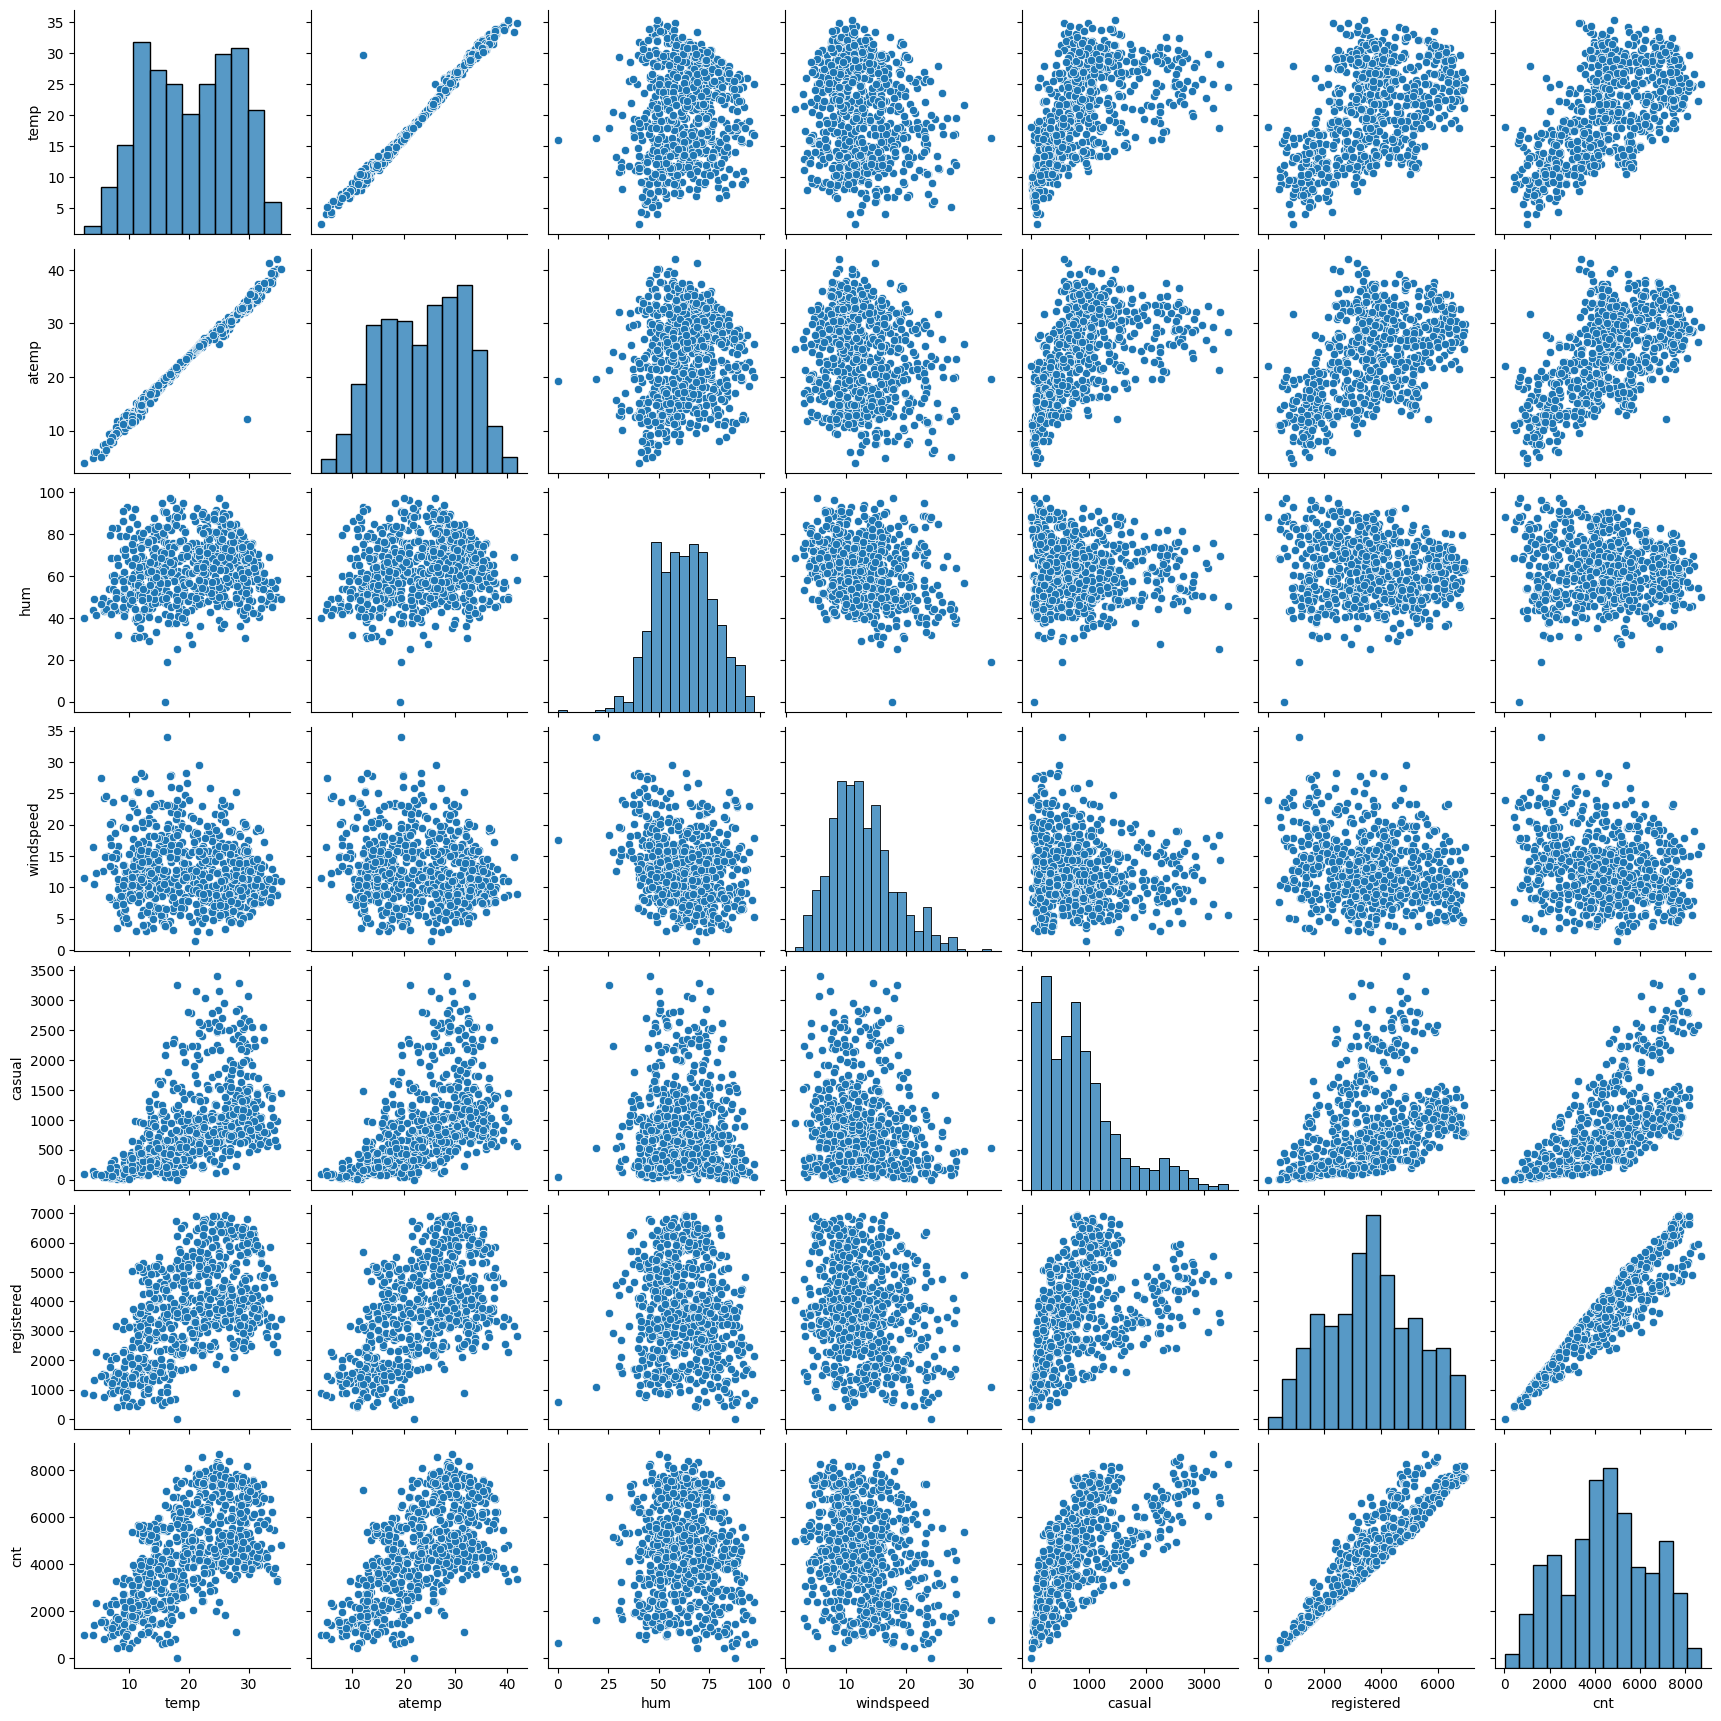

                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991696  0.128565  -0.158186  0.542731    0.539436   
atemp       0.991696  1.000000  0.141512  -0.183876  0.543362    0.543678   
hum         0.128565  0.141512  1.000000  -0.248506 -0.075211   -0.089212   
windspeed  -0.158186 -0.183876 -0.248506   1.000000 -0.167995   -0.217914   
casual      0.542731  0.543362 -0.075211  -0.167995  1.000000    0.394137   
registered  0.539436  0.543678 -0.089212  -0.217914  0.394137    1.000000   
cnt         0.627044  0.630685 -0.098543  -0.235132  0.672123    0.945411   

                 cnt  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
cnt         1.000000  
temp          1.000000
atemp         0.991696
hum           0.128565
windspeed    -0.158186
casual        0.542731
registered    0.539436
cnt           0.627044
Name: temp, dtype: float64


In [16]:

# Select the columns for the pair plot
pairplot_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
subset_df = day_df[pairplot_cols]

# Create the pair plot
sns.pairplot(subset_df)
plt.show()

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Focus on the 'temp' column to see its correlation with other variables
print(correlation_matrix['temp'])


In [80]:
y_col = 'cnt'
working_day_df = day_df[day_df['workingday'] == 1]
X = day_df[['temp','hum']] #independent variables
y = day_df[y_col] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
X_train.shape, X_test.shape

((584, 2), (146, 2))

In [81]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

  feature       VIF
0    temp  6.903594
1     hum  6.903594


In [82]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

2413.149247484207
[169.06832637 -21.12686149]


In [83]:
predictions = model.predict(X_train)
mse = mean_squared_error(y_train, predictions)
r2 = r2_score(y_train, predictions)
print("MSE:", mse)
print("R2:", r2)

MSE: 2116004.6118119494
R2: 0.42621968882037886


In [84]:
predictions_test = model.predict(X_test)
mse = mean_squared_error(y_test, predictions_test)
r2 = r2_score(y_test, predictions_test)
print("MSE:", mse)
print("R2:", r2)

MSE: 2297378.666448319
R2: 0.4161734038040301
